# Test Map Interface with Visual Scanning (Brute Force)

In [3]:
from IPython.display import HTML
from PIL import Image
import math
import matplotlib.animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [4]:
map_img = Image.open("./data/sample.png").convert("RGB")
width, height = map_img.size

# pin_img = Image.open("./data/pin.png").convert("RGB")
pin_img = Image.open("./data/slice.png").convert("RGB")
pin_width, pin_height = pin_img.size

# Configuration
area = pin_img.size

print("Map size  = {0}px x {1}px".format(width, height))
print("Pin size  = {0}px x {1}px".format(pin_width, pin_height))
print("Area size = {0}px x {1}px".format(area[0], area[1]))


Map size  = 278px x 488px
Pin size  = 19px x 36px
Area size = 19px x 36px


In [5]:
coords = []
steps = 1

for y in range(0, height, steps):
    for x in range(0, width, steps):
        coords.append((x, y))

print(coords[0:5], end="...")

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]...

In [6]:
# Extract samples
target_idx = 91652 # Our pin is in this index

start = target_idx - 40
size = 40
sample = coords[start : start + size]

# Slices
slices = []

# for (x, y) in coords:
for (x, y) in sample:
    rect = patches.Rectangle((x - 10, y - 10), pin_width + 20, pin_height + 20, linewidth=1, edgecolor="r", facecolor="none")
    slices.append(rect)
    
slices[0:5]

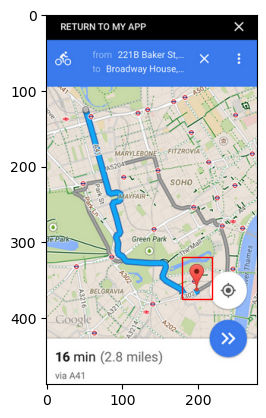

In [7]:
# ---------------------------------------------------------------------
# Showing how the scanning works
# ---------------------------------------------------------------------

fig, ax = plt.subplots()

ax.imshow(map_img)

def animate(i):
    slices[i].set_visible(False) # Set previous slice as False
    ax.add_patch(slices[i+1]) # Add new slice

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=size-1, interval=50)

HTML(ani.to_jshtml())

In [8]:
# ---------------------------------------------------------------------
# Create map of pixels to check in
# ---------------------------------------------------------------------

alive_pxs = []
pin = np.asarray(pin_img)

(Y, X, Z) = pin.shape

def is_off(rgb):
    (r, g, b) = rgb
    return (int(r)+ int(g)+ int(b)) == 0

for y in range(Y):
    for x in range(X):
        if not is_off(pin[y][x]):
            alive_pxs.append([y, x])

# ---------------------------------------------------------------------
# Calculate similarity between slices using euclidean distance
# ---------------------------------------------------------------------

def calculate_distance(slice_arr, target_arr, alive_pxs):

    dist_list = []

    for (y, x) in alive_pxs:

        # TODO: feat: convert the image to grayscale to reduce dimensionality
        #       We will have a single value instead of [a1, a2, a3] to compare
        (a1, a2, a3) = slice_arr[y][x]
        (b1, b2, b3) = target_arr[y][x]

        dist = math.sqrt(math.pow(a1 - b1, 2) + math.pow(a2 - b2, 2) + math.pow(a3 - b3, 2)) # 0 = identical
        dist_list.append(dist)
        
    return statistics.mean(dist_list)

# ---------------------------------------------------------------------
# Find the pin by comparing slice by slice
# ---------------------------------------------------------------------

def find_target(image, target, err = 10):
    
    map = np.asarray(image)
    target_arr = np.asarray(target)

    (Y, X, Z) = map.shape
    (H, W, Z) = target_arr.shape

    # TODO: refactor: we can play with different steps and error tolerances to speed things up
    # for y in range(329, Y - H):
    for y in range(0, Y - H):
        for x in range(X - W):

            slice_arr = map[y : y + H, x : x + W]

            dist = calculate_distance(
                slice_arr=slice_arr,
                target_arr=target_arr,
                alive_pxs=alive_pxs
            )
            
            # print("({0}, {1}), w={2}, h={3}".format(x, y, W, H))

            if dist < err:
                return {
                    "x": x,
                    "y": y,
                    "w": W,
                    "h": H
                }

found = find_target(image=map_img, target=pin_img)

print(found)

/var/folders/vr/zq1vf6p10s54lh4qxbgv05rh0000gn/T/ipykernel_57107/1345580899.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = math.sqrt(math.pow(a1 - b1, 2) + math.pow(a2 - b2, 2) + math.pow(a3 - b3, 2)) # 0 = identical


KeyboardInterrupt: 

In [9]:
# Pin position = (x=189, y=329, w=19px, h=36px)
pin_x = 189
pin_y = 329

x = found["x"]
y = found["y"]
w = found["w"]
h = found["h"]

fig, ax = plt.subplots()

ax.imshow(map_img)
    
rect = patches.Rectangle((x-10, y-10), w+20, h+20, linewidth=2, edgecolor="r", facecolor="none")
ax.add_patch(rect)

fig.show()

NameError: name 'found' is not defined